In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
match_line_ups = pd.read_csv("/content/match_line_ups.csv")

In [38]:
match_line_ups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364 entries, 0 to 3363
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   matchid          3364 non-null   int64  
 1   hometeamname     3364 non-null   object 
 2   awayteamname     3364 non-null   object 
 3   ispitch          3364 non-null   bool   
 4   isbench          3364 non-null   bool   
 5   isstaff          3364 non-null   bool   
 6   country          3170 non-null   object 
 7   id               3364 non-null   int64  
 8   officialname     2996 non-null   object 
 9   officialsurname  3234 non-null   object 
 10  shortname        2345 non-null   object 
 11  role             3364 non-null   object 
 12  jerseynumber     2345 non-null   float64
 13  isgoalkeeper     2345 non-null   object 
 14  jerseyname       2345 non-null   object 
 15  iscaptain        2345 non-null   object 
 16  tacticx          2345 non-null   float64
 17  tacticy       

In [39]:
match_line_ups.shape

(3364, 20)

In [40]:
match_line_ups.describe()

,matchid,id,jerseynumber,tacticx,tacticy,numorder,isbooked
count,3.364000e+03,3.364000e+03,2345.000000,2345.000000,2345.000000,2345.000000,0.0
mean,2.024466e+06,1.847065e+08,12.997441,495.820043,332.622175,11.995309,NaN
std,1.464137e+01,1.075853e+08,7.381313,316.830699,283.950893,6.632187,NaN
min,2.024441e+06,1.050000e+02,1.000000,0.000000,0.000000,1.000000,NaN
25%,2.024453e+06,5.001816e+07,7.000000,321.000000,0.000000,6.000000,NaN
50%,2.024466e+06,2.500429e+08,13.000000,497.000000,373.000000,12.000000,NaN
75%,2.024478e+06,2.500793e+08,19.000000,674.000000,538.000000,18.000000,NaN
max,2.024491e+06,2.501560e+08,26.000000,1000.000000,911.000000,23.000000,NaN


In [41]:
match_line_ups.columns.tolist()

['matchid',
 'hometeamname',
 'awayteamname',
 'ispitch',
 'isbench',
 'isstaff',
 'country',
 'id',
 'officialname',
 'officialsurname',
 'shortname',
 'role',
 'jerseynumber',
 'isgoalkeeper',
 'jerseyname',
 'iscaptain',
 'tacticx',
 'tacticy',
 'numorder',
 'isbooked']

In [42]:
match_line_ups.isna().sum()

matchid               0
hometeamname          0
awayteamname          0
ispitch               0
isbench               0
isstaff               0
country             194
id                    0
officialname        368
officialsurname     130
shortname          1019
role                  0
jerseynumber       1019
isgoalkeeper       1019
jerseyname         1019
iscaptain          1019
tacticx            1019
tacticy            1019
numorder           1019
isbooked           3364
dtype: int64

In [43]:
numeric_columns = match_line_ups.select_dtypes(include=['number']).columns
categorical_columns = match_line_ups.select_dtypes(include=['object']).columns

match_line_ups[numeric_columns] = match_line_ups[numeric_columns].fillna(match_line_ups[numeric_columns].mean())
match_line_ups[categorical_columns]=match_line_ups[categorical_columns].fillna(match_line_ups[categorical_columns].mode())

In [44]:
match_line_ups.nunique()

matchid             51
hometeamname        24
awayteamname        24
ispitch              2
isbench              2
isstaff              2
country             28
id                 881
officialname       524
officialsurname    817
shortname          606
role                20
jerseynumber        27
isgoalkeeper         2
jerseyname         604
iscaptain            2
tacticx            540
tacticy            634
numorder            24
isbooked             0
dtype: int64

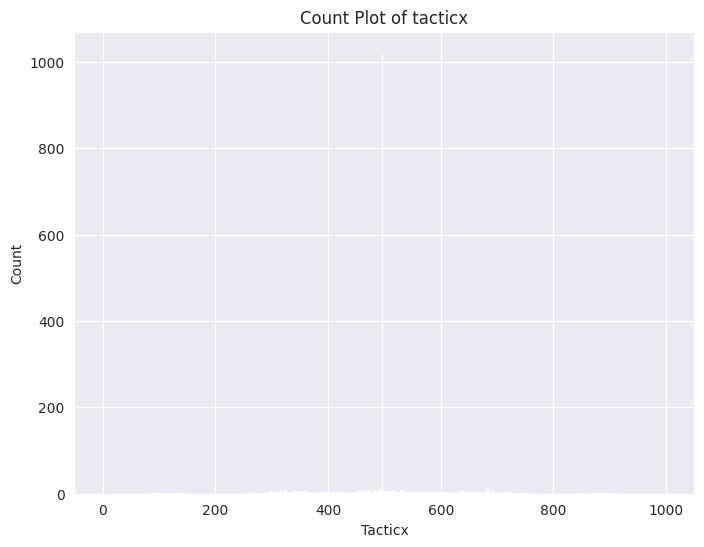

In [45]:
# Assuming 'data' is your DataFrame
tacticx_counts = match_line_ups['tacticx'].value_counts()

# Using Matplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(tacticx_counts.index, tacticx_counts, color='pink')
plt.title('Count Plot of tacticx')
plt.xlabel('Tacticx')
plt.ylabel('Count')
plt.show()

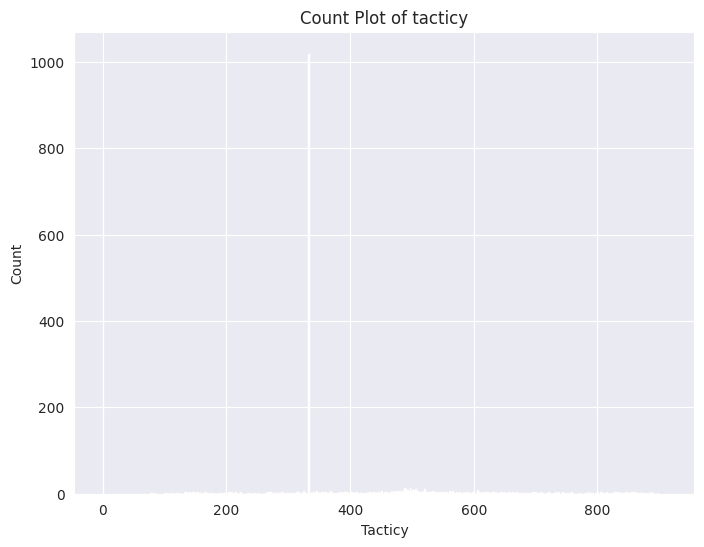

In [46]:
# Assuming 'data' is your DataFrame
tacticy_counts = match_line_ups['tacticy'].value_counts()

# Using Matplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(tacticy_counts.index, tacticy_counts, color='orange')
plt.title('Count Plot of tacticy')
plt.xlabel('Tacticy')
plt.ylabel('Count')
plt.show()

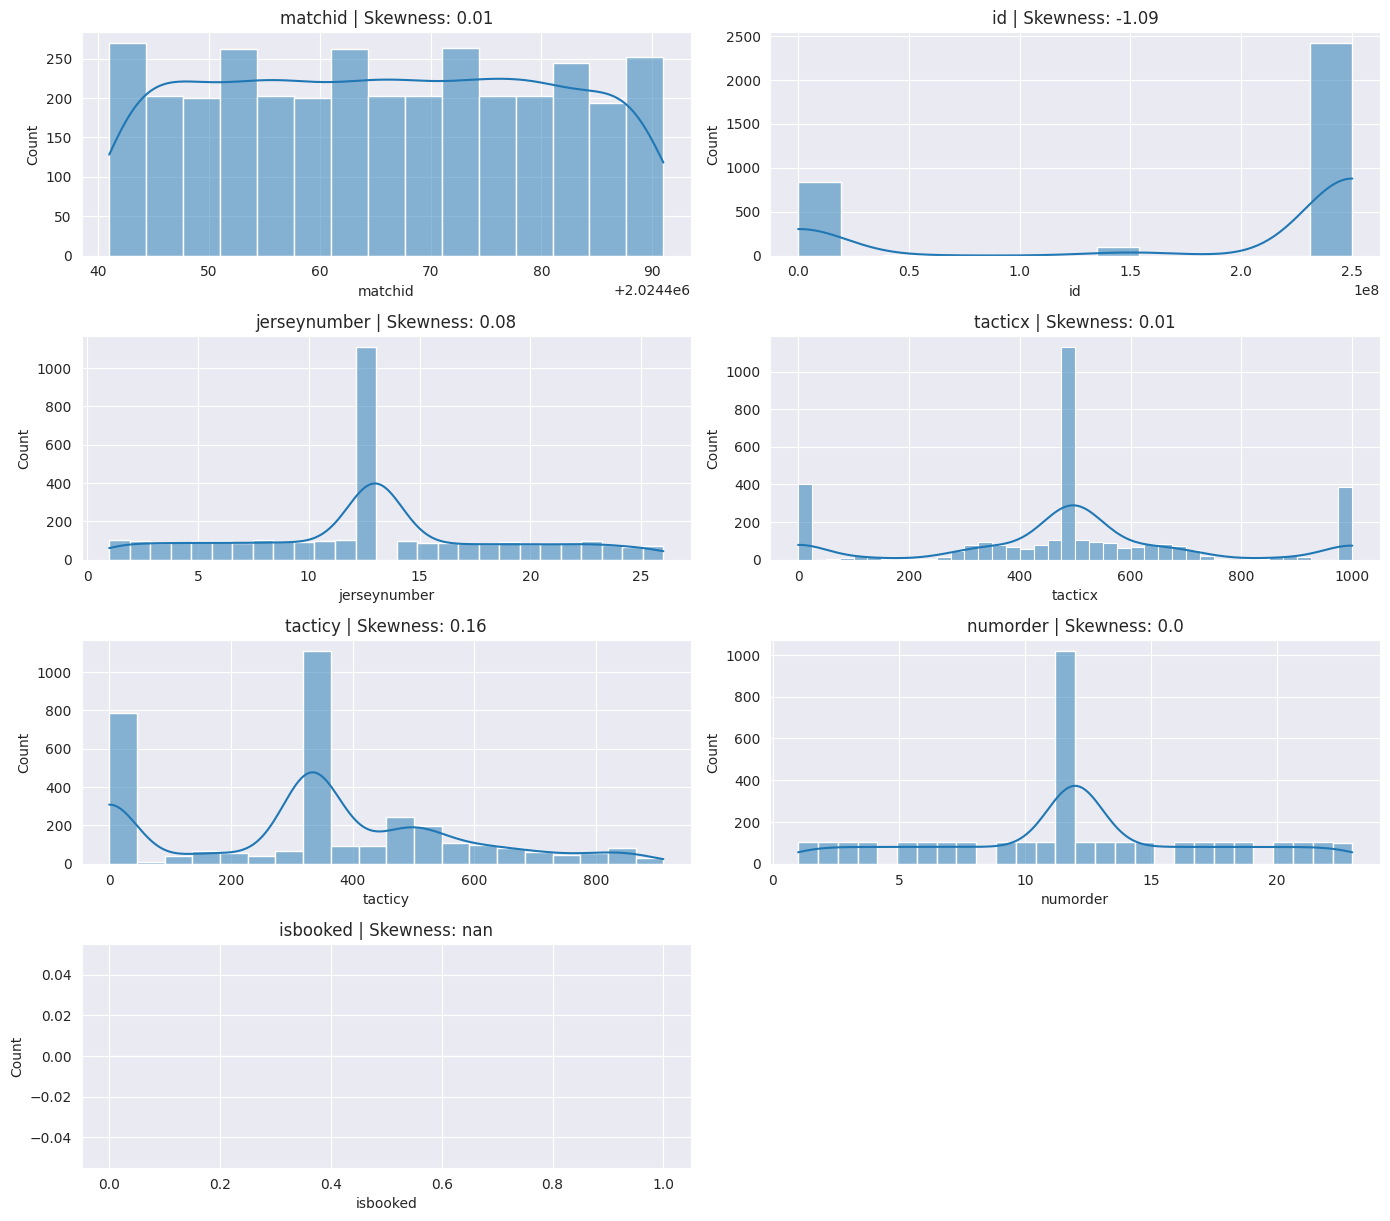

In [47]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = match_line_ups.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(match_line_ups[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(match_line_ups[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

<ipython-input-48-a5c777bceccb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="tacticx", y="tacticy", data=match_line_ups, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 99.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packag

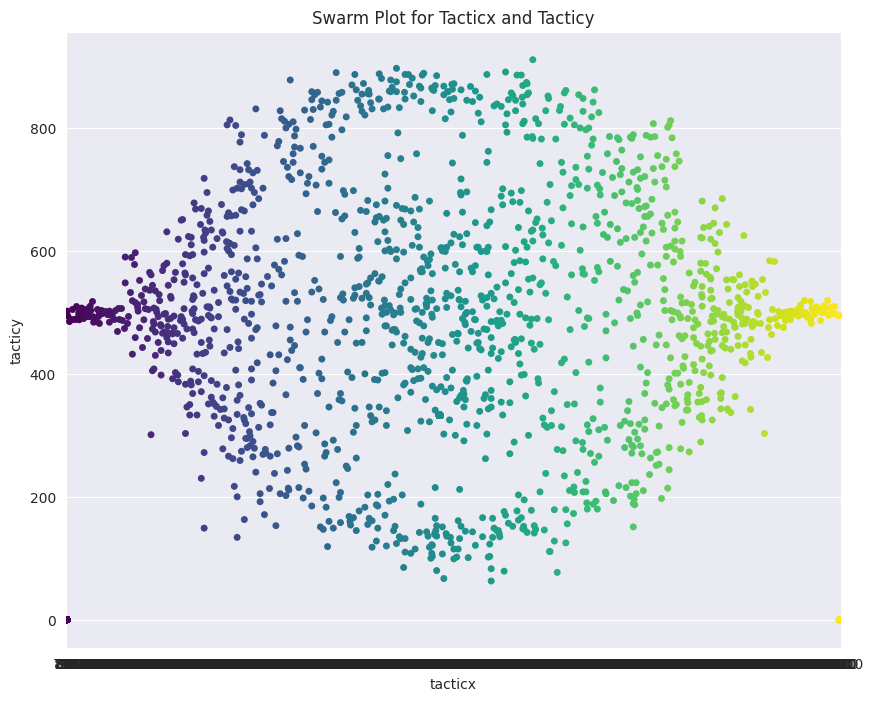

In [48]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 8))

# Using Seaborn to create a swarm plot
sns.swarmplot(x="tacticx", y="tacticy", data=match_line_ups, palette='viridis')

plt.title('Swarm Plot for Tacticx and Tacticy')
plt.xlabel('tacticx')
plt.ylabel('tacticy')
plt.show()

<Figure size 1000x600 with 0 Axes>

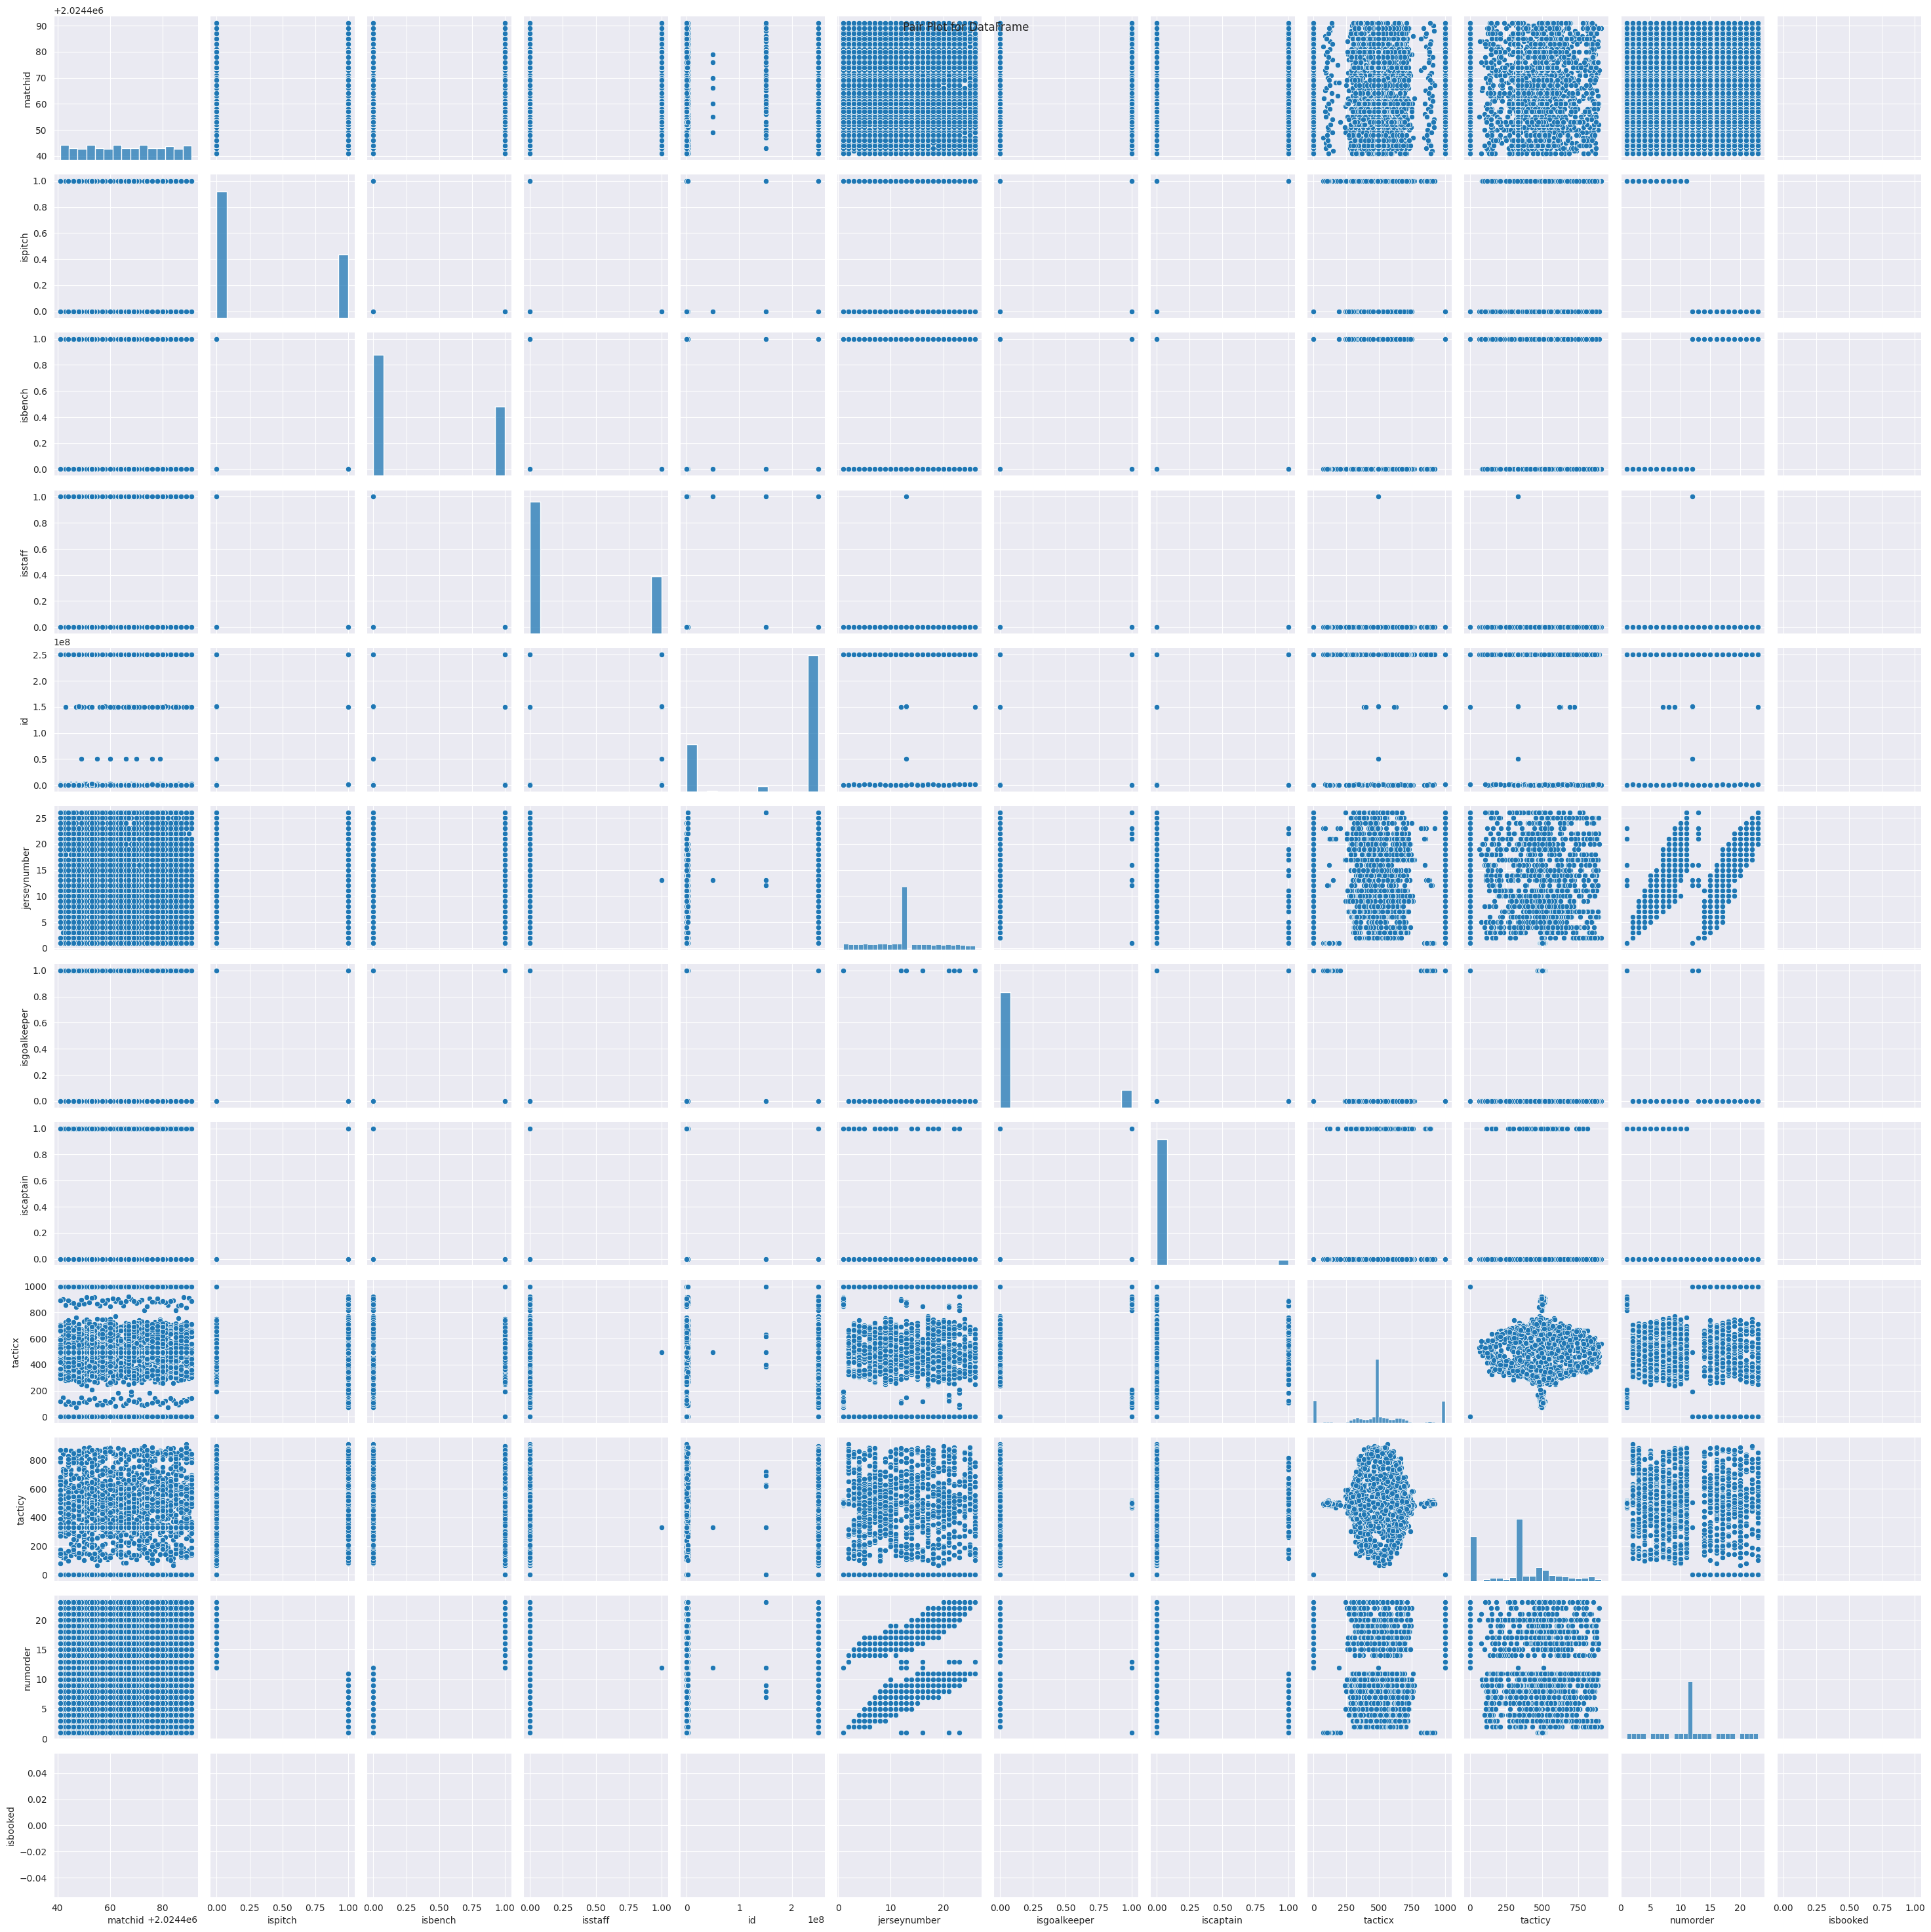

In [49]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))

# Using Seaborn to create a pair plot with the specified color palette
sns.pairplot(match_line_ups)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

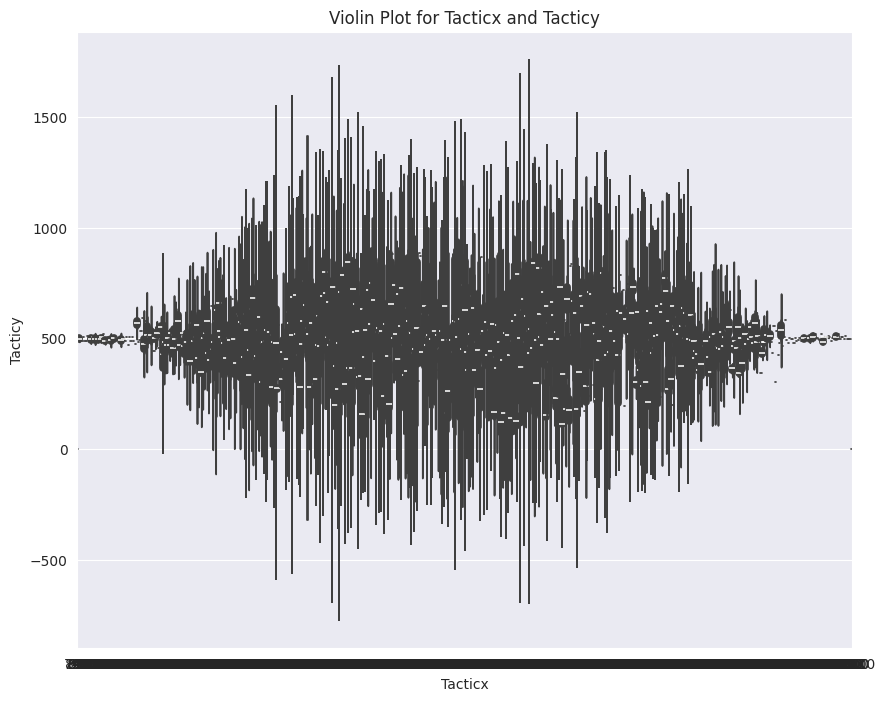

In [50]:
# Assuming 'data' is your DataFrame
match_line_ups['country'] = match_line_ups['country'].astype(str)  # Convert 'quality' to categorical

plt.figure(figsize=(10, 8))

# Using Seaborn to create a violin plot
sns.violinplot(x="tacticx", y="tacticy",data=match_line_ups)
plt.title('Violin Plot for Tacticx and Tacticy')
plt.xlabel('Tacticx')
plt.ylabel('Tacticy')
plt.show()

<Axes: xlabel='tacticx', ylabel='tacticy'>

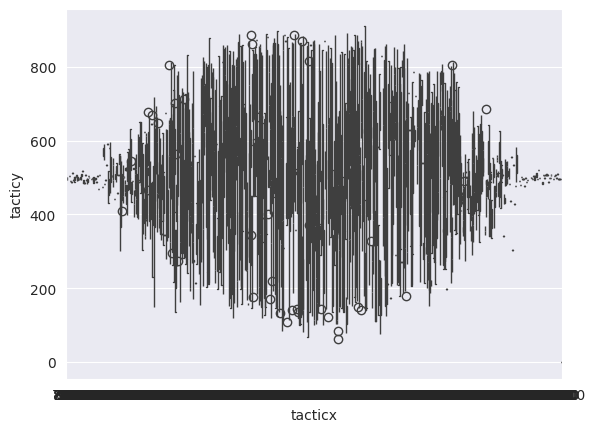

In [51]:
sns.boxplot(x='tacticx',y='tacticy',data=match_line_ups)

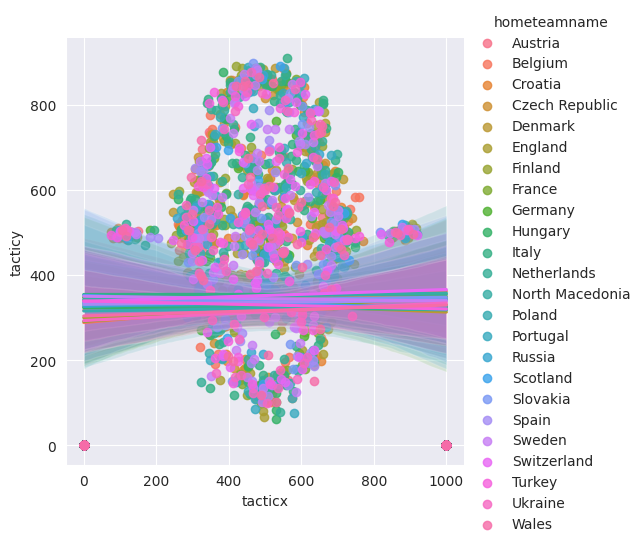

In [52]:
sns.lmplot(data=match_line_ups, x="tacticx", y="tacticy",hue='hometeamname')

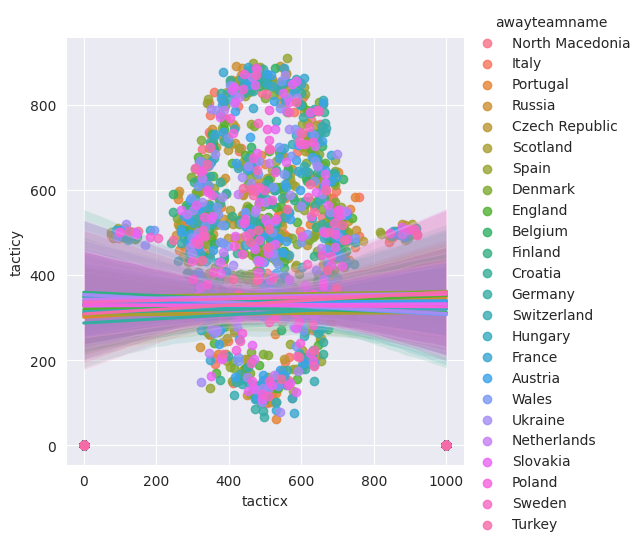

In [53]:
sns.lmplot(data=match_line_ups, x="tacticx", y="tacticy",hue='awayteamname')

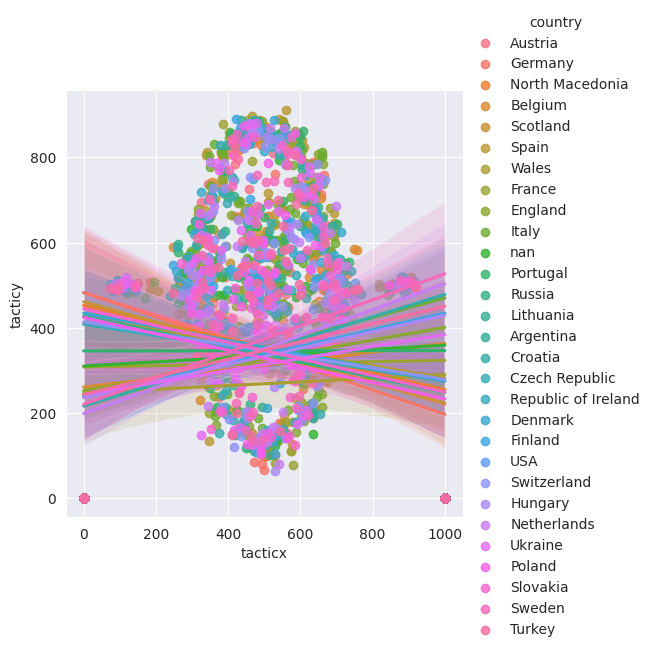

In [54]:
sns.lmplot(data=match_line_ups, x="tacticx", y="tacticy",hue='country')

In [55]:
data1 = match_line_ups[['tacticx','tacticy','jerseynumber','numorder']]

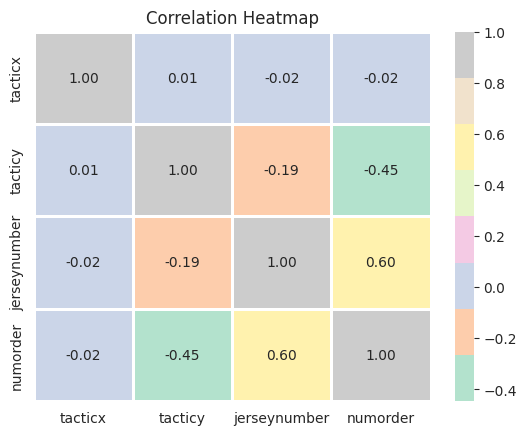

In [56]:
sns.heatmap(data1.corr(),annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

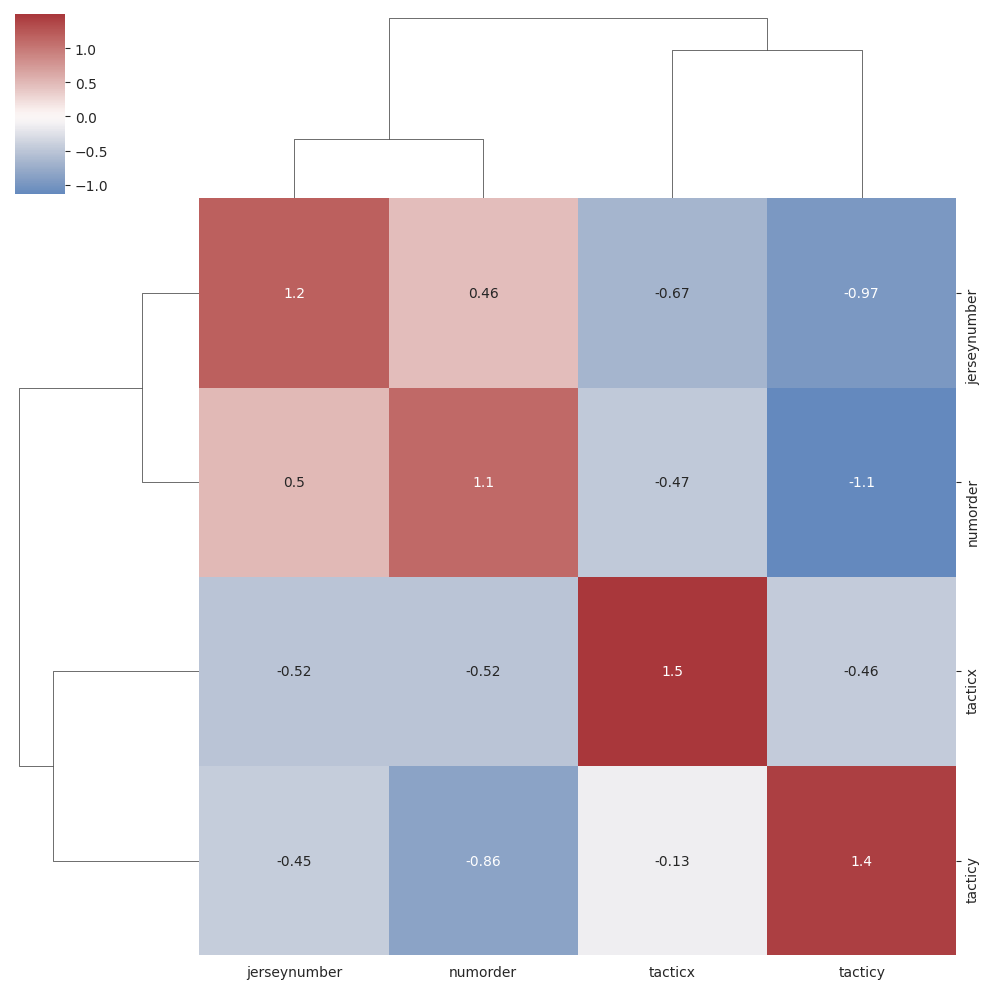

In [57]:
sns.clustermap(data=data1.corr(),z_score=0, cmap="vlag", center=0,annot=True)

<Axes: >

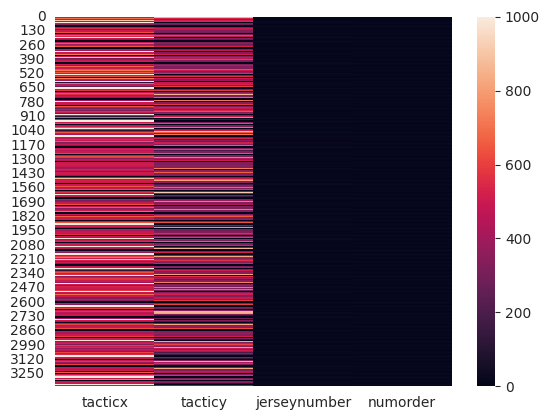

In [58]:
sns.heatmap(data=data1)

<Axes: ylabel='Proportion'>

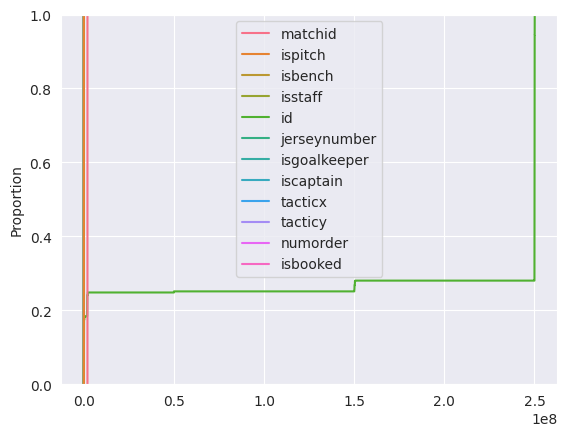

In [59]:
sns.ecdfplot(data=match_line_ups)

In [60]:
print(match_line_ups.head())

   matchid hometeamname     awayteamname  ispitch  isbench  isstaff  country  \
0  2024442      Austria  North Macedonia     True    False    False  Austria   
1  2024442      Austria  North Macedonia     True    False    False  Austria   
2  2024442      Austria  North Macedonia     True    False    False  Austria   
3  2024442      Austria  North Macedonia     True    False    False  Austria   
4  2024442      Austria  North Macedonia     True    False    False  Austria   

          id officialname officialsurname    shortname         role  \
0  250056875       Daniel        Bachmann     Bachmann  goalkeepers   
1     101177      Andreas           Ulmer        Ulmer    defenders   
2    1909713   Aleksandar        Dragovic     Dragovic    defenders   
3  250020234       Martin     Hinteregger  Hinteregger    defenders   
4    1906540        David           Alaba        Alaba    defenders   

   jerseynumber isgoalkeeper   jerseyname iscaptain  tacticx  tacticy  \
0          13.0    

In [61]:
match_line_ups['hometeamname'].describe()

count      3364
unique       24
top       Italy
freq        331
Name: hometeamname, dtype: object

In [62]:
data1= data1.dropna()

In [63]:
data1

,tacticx,tacticy,jerseynumber,numorder
0,150.000000,504.000000,13.000000,1.000000
1,562.000000,153.000000,2.000000,2.000000
2,345.000000,737.000000,3.000000,3.000000
3,370.000000,317.000000,4.000000,4.000000
4,328.000000,455.000000,8.000000,5.000000
...,...,...,...,...
3359,495.820043,332.622175,12.997441,11.995309
3360,495.820043,332.622175,12.997441,11.995309
3361,495.820043,332.622175,12.997441,11.995309
3362,495.820043,332.622175,12.997441,11.995309


In [64]:
from sklearn.cluster import KMeans
clusters = 5

kmeans = KMeans(n_clusters = clusters)
kmeans.fit(data1)

print(kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 4 2 ... 4 4 4]


In [65]:
from sklearn.decomposition import PCA

pca = PCA(3)
pca.fit(data1)

pca_data = pd.DataFrame(pca.transform(data1))

print(pca_data.head())

            0           1          2
0  333.428102  194.477545  -4.835376
1  -53.898757 -183.518519 -16.524527
2  123.113032  413.767289  -9.389232
3  126.574413   -6.949468 -12.181588
4  159.149733  133.536540  -6.985701


<Axes: >

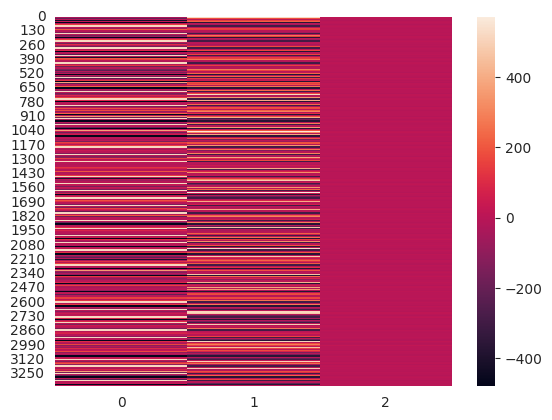

In [66]:
sns.heatmap(pca_data)

<Axes: >

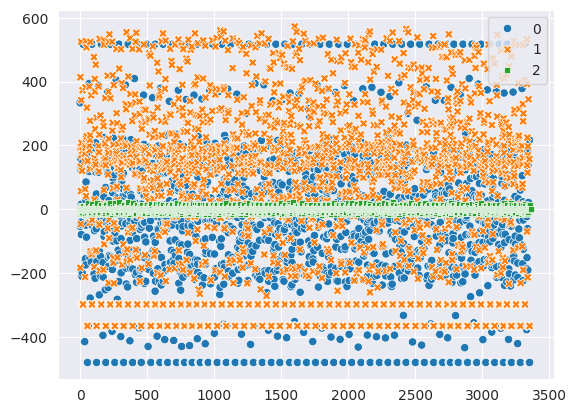

In [67]:
sns.scatterplot(pca_data)

<Axes: >

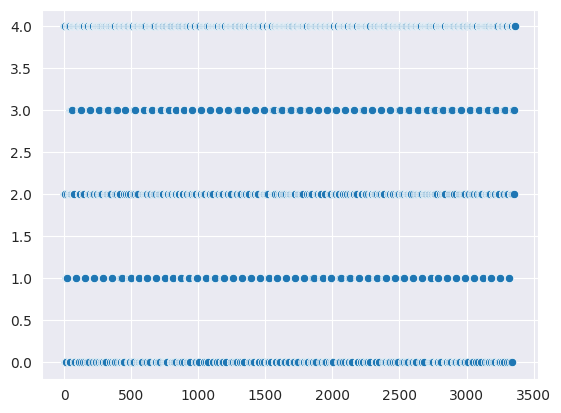

In [68]:
sns.scatterplot(kmeans.labels_)

In [70]:
#sns.clustermap(pca_data)

<Axes: ylabel='Density'>

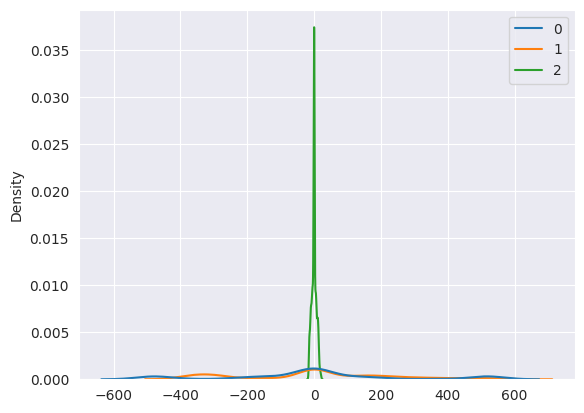

In [71]:
sns.kdeplot(data=pca_data)

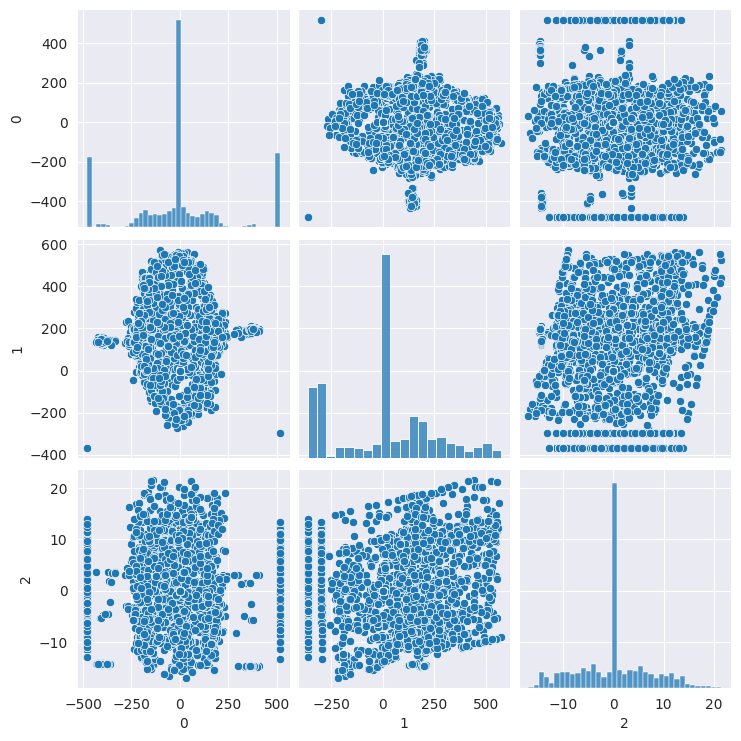

In [72]:
sns.pairplot(data=pca_data)

<Axes: ylabel='Density'>

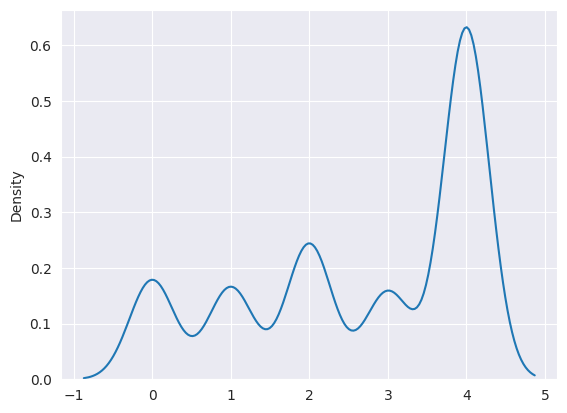

In [73]:
sns.kdeplot(data=kmeans.labels_)

In [74]:
max=match_line_ups[['matchid','id','jerseynumber','tacticx','tacticy','numorder']].max()
print('Maximum:',max)
min=match_line_ups[['matchid','id','jerseynumber','tacticx','tacticy','numorder']].min()
print('Minimum:',min)
mean = match_line_ups[['matchid','id','jerseynumber','tacticx','tacticy','numorder']].mean()
print('Minimum:',mean)


Maximum: matchid           2024491.0
id              250156002.0
jerseynumber           26.0
tacticx              1000.0
tacticy               911.0
numorder               23.0
dtype: float64
Minimum: matchid         2024441.0
id                  105.0
jerseynumber          1.0
tacticx               0.0
tacticy               0.0
numorder              1.0
dtype: float64
Minimum: matchid         2.024466e+06
id              1.847065e+08
jerseynumber    1.299744e+01
tacticx         4.958200e+02
tacticy         3.326222e+02
numorder        1.199531e+01
dtype: float64


In [75]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

In [78]:
X, y = data1.iloc[:, :-1], data1.iloc[:, -1]

In [79]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)


In [80]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [81]:
# Fitting the model
xgb_r.fit(train_X, train_y)

# Predict the model
pred = xgb_r.predict(test_X)

# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

RMSE :  3.630437


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:10:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


The maximum match id on the tactic x and tactic y done as a id number as well:

Maximum matchid is 2024491.0

id maximum is 250156002.0

Jerseynumber is 26.0

And the number order is 23.0

Tacticx is 1000.0

Tacticy is 911.0


The minimum match id on the tactic x and tactic y done as a id number as well:

Minimum matchid is 2024441.0

id minimum is 105.0

Jerseynumber is 1.0

And the number order is 1.0

Tacticx is 0

Tacticy is 0

The average match id on the tactic x and tactic y done as a id number as well:

Average matchid is: 2.024466e+06

id average is 1.847065e+08

Jerseynumber is 1.299744e+01

And the number order is 1.199531e+01

Tacticx is 4.958200e+02

Tacticy is 3.326222e+02

RMSE in the case of done in matchlineups for the xgboost linear regression is : 3.63